# Task 1: Exploratory Data Analysis (EDA)

In [1]:
# import required library
import pandas as pd

# read the dataset
df = pd.read_csv("PrimeFrontier_SolarDeploymentDataset.csv")

# check the first few rows
df.head()

,Region,Solar_Irradiance_kWh_m2_day,Rural_Pop_Density_per_km2,Grid_Access_Percent,Infrastructure_Index,Electricity_Cost_USD_per_kWh,Terrain_Ruggedness_Score
0,Region_1,6.00,90,23.0,0.39,0.31,0.33
1,Region_2,5.36,206,73.3,0.88,0.35,0.55
2,Region_3,6.15,64,28.3,0.49,0.36,0.57
3,Region_4,7.02,350,53.0,0.22,0.22,0.98
4,Region_5,5.27,114,35.1,0.44,0.37,0.08


In [2]:
# Get a concise summary of the data
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        50 non-null     object 
 1   Solar_Irradiance_kWh_m2_day   50 non-null     float64
 2   Rural_Pop_Density_per_km2     50 non-null     int64  
 3   Grid_Access_Percent           50 non-null     float64
 4   Infrastructure_Index          50 non-null     float64
 5   Electricity_Cost_USD_per_kWh  50 non-null     float64
 6   Terrain_Ruggedness_Score      50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [3]:
# Check for missing values
missing = df.isnull().sum()
missing

Region                          0
Solar_Irradiance_kWh_m2_day     0
Rural_Pop_Density_per_km2       0
Grid_Access_Percent             0
Infrastructure_Index            0
Electricity_Cost_USD_per_kWh    0
Terrain_Ruggedness_Score        0
dtype: int64

In [4]:
# Check data types
data_types = df.dtypes
data_types

Region                           object
Solar_Irradiance_kWh_m2_day     float64
Rural_Pop_Density_per_km2         int64
Grid_Access_Percent             float64
Infrastructure_Index            float64
Electricity_Cost_USD_per_kWh    float64
Terrain_Ruggedness_Score        float64
dtype: object

In [5]:
# Statistical summary for numerical data
summary_stats = df.describe()
summary_stats

,Solar_Irradiance_kWh_m2_day,Rural_Pop_Density_per_km2,Grid_Access_Percent,Infrastructure_Index,Electricity_Cost_USD_per_kWh,Terrain_Ruggedness_Score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.275200,258.500000,52.816000,0.574800,0.277800,0.419800
std,0.933235,136.235578,20.202731,0.195242,0.081323,0.278732
min,3.540000,54.000000,20.000000,0.220000,0.110000,0.010000
25%,4.637500,134.500000,36.400000,0.407500,0.212500,0.220000
50%,5.270000,264.000000,50.750000,0.565000,0.275000,0.345000
75%,5.832500,376.750000,68.150000,0.747500,0.357500,0.602500
max,7.350000,498.000000,94.800000,0.900000,0.400000,0.980000


In [6]:
# Identify outliers using the IQR method
outliers_count = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_rows = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outliers_count[col] = len(outlier_rows)
    
outliers_count

{'Solar_Irradiance_kWh_m2_day': 0,
 'Rural_Pop_Density_per_km2': 0,
 'Grid_Access_Percent': 0,
 'Infrastructure_Index': 0,
 'Electricity_Cost_USD_per_kWh': 0,
 'Terrain_Ruggedness_Score': 0}

## Data Cleaning Summary

| **Check**          | **Result**                                          |
| ------------------ | --------------------------------------------------- |
| **Missing Values** | None — all columns are complete                     |
| **Data Types**     | All appropriate: floats, integers, and region names |
| **Outliers**       | No statistical outliers detected using IQR method   |

<b>Conclusion:</b> The dataset is clean and ready for exploratory analysis. No transformation is needed at this stage.

#  Visual Exploration

## 1. Histogram: Solar Irradiance

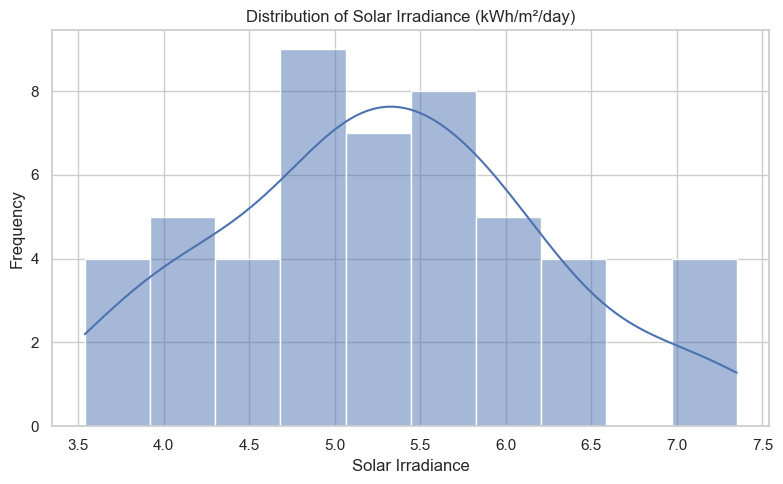

In [7]:
# Set plot aesthetics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histogram: Solar Irradiance
plt.figure(figsize=(8, 5))
sns.histplot(df['Solar_Irradiance_kWh_m2_day'], bins=10, kde=True)
plt.title('Distribution of Solar Irradiance (kWh/m²/day)')
plt.xlabel('Solar Irradiance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 2. Boxplot: Electricity Cost

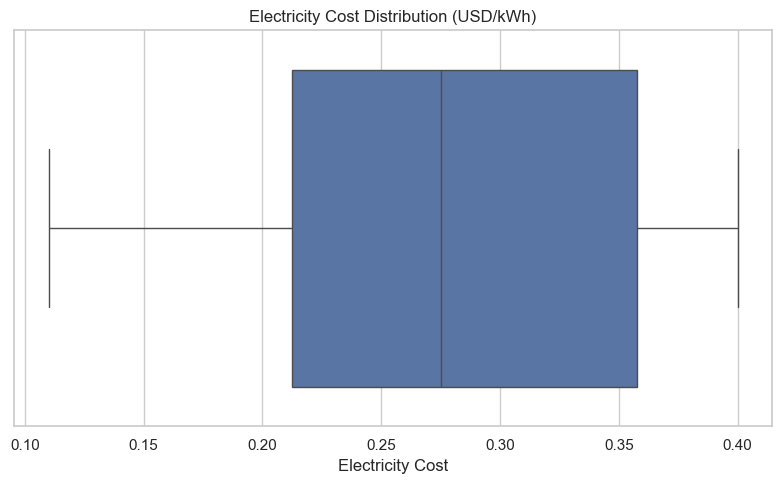

In [8]:
# Boxplot: Electricity Cost
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Electricity_Cost_USD_per_kWh'])
plt.title('Electricity Cost Distribution (USD/kWh)')
plt.xlabel('Electricity Cost')
plt.tight_layout()
plt.show()

## 3. Scatterplot: Terrain Ruggedness vs Solar Irradiance

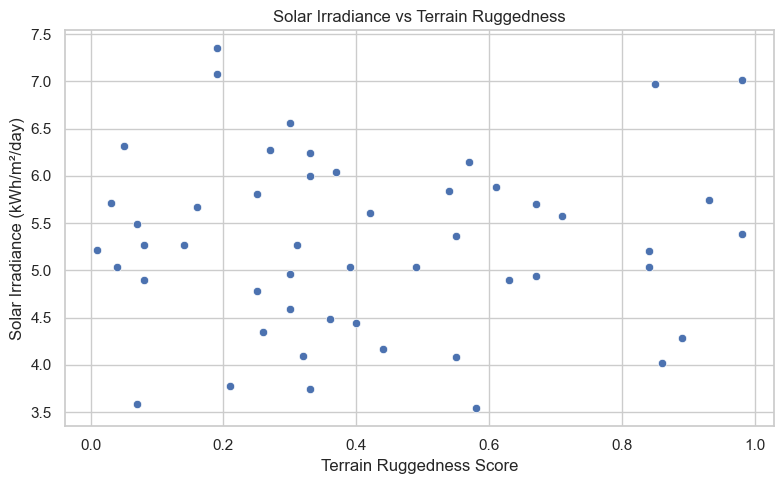

In [9]:
# Scatterplot: Terrain Ruggedness vs Solar Irradiance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Terrain_Ruggedness_Score', y='Solar_Irradiance_kWh_m2_day')
plt.title('Solar Irradiance vs Terrain Ruggedness')
plt.xlabel('Terrain Ruggedness Score')
plt.ylabel('Solar Irradiance (kWh/m²/day)')
plt.tight_layout()
plt.show()

# 4. Scatterplot: Rural Pop. vs Grid Access

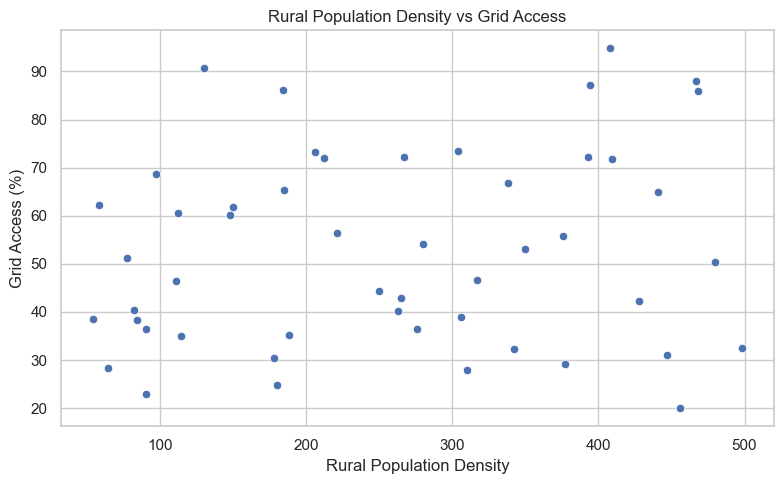

In [10]:
# Scatterplot: Rural Pop. vs Grid Access
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rural_Pop_Density_per_km2', y='Grid_Access_Percent')
plt.title('Rural Population Density vs Grid Access')
plt.xlabel('Rural Population Density')
plt.ylabel('Grid Access (%)')
plt.tight_layout()
plt.show()

# 5. Heatmap: Correlation of Key Metrics

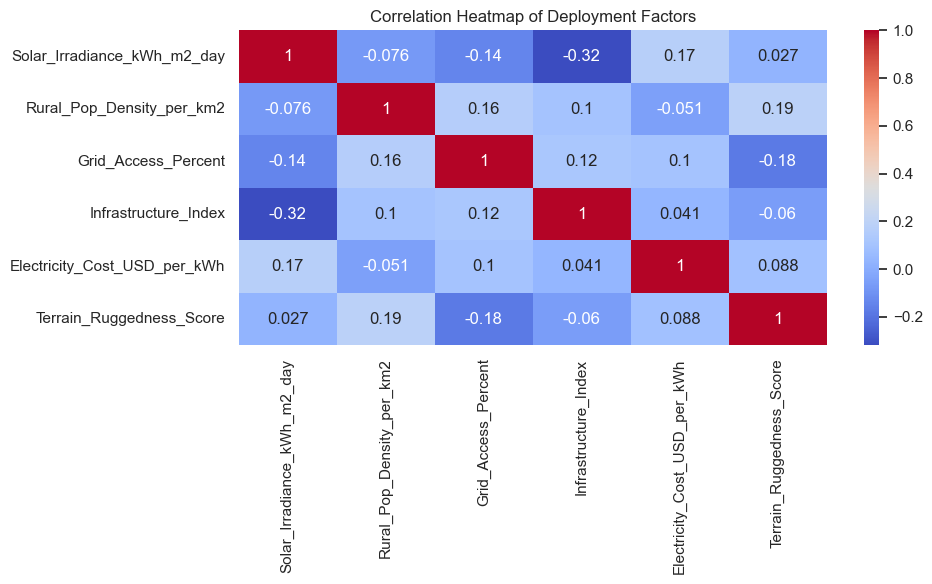

In [11]:
# Heatmap: Correlation of Key Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Region']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Deployment Factors')
plt.tight_layout()
plt.show()

### 🔍 Task 1 Summary: Key Insights & Red Flags

---

#### **🟡 Insight 1: Solar Potential is High in Many Regions**

* Solar irradiance spans from \~3.5 to 7.3 kWh/m²/day.
* Majority of regions cluster around 5.0–6.5, indicating generally favorable conditions.
* **Implication:** Regions with irradiance above 6.0 are prime candidates for immediate solar investment.

✅ *Actionable Suggestion:* Flag the top 25% irradiance regions for detailed feasibility analysis.

---

#### **🔴 Insight 2: High Energy Cost is a Real Barrier**

* Electricity costs range from **\$0.11 to \$0.40/kWh**, with a mean of \~\$0.28.
* Significant number of regions exceed the global average of \$0.15–\$0.20/kWh.
* **Implication:** High prices make solar an economically compelling alternative for rural areas.

✅ *Actionable Suggestion:* we will use price sensitivity data to model consumer adoption curves in rollout planning.

---

#### **🟠 Insight 3: Inverse Relationship Between Access & Need**

* Terrain ruggedness is **negatively** correlated with infrastructure index and grid access.
* **High-ruggedness areas often lack grid coverage** and show high solar potential.
* **Implication:** These areas are underserved but technically feasible — ideal for off-grid or hybrid solar models.

✅ *Actionable Suggestion:* Segment regions into:

* **On-grid augmentation zones**
* **Off-grid pilot zones**
* **Logistics-intensive but high-return zones**

---